In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def func(y, x, gamma):
    # gamma = 0.86998
    return np.array([y[1], -(gamma**2/2*x*y[1]+3*y[0]**2*y[1]**2)/y[0]**3])

def rk4(f, y0, t, g):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], g)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., g)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., g)
        k4 = f(y[i] + k3 * h, t[i] + h, g)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [45]:
# x = np.linspace(0,1,200)
N = 100
xi = np.cos(np.pi / (N+1) * (np.arange(1, N + 2) - 0.5)).astype(np.float64)
xi[0], xi[-1] = 1, -1
xi = xi[::-1] * 0.5 + 0.5

alpha = -0.2
y0 = np.array([1, alpha])
gamma0 = 0.2
solution = rk4(func, y0, xi, gamma0)


T = 0.6

eps = 1
eps_g = 1
c = 0
while eps_g > 10**(-6):
    while eps > 10**(-6):
        F = solution[-1,0] - T
        y1 = np.array([1, alpha + 10**(-6)])
        solution_1 = rk4(func, y1, xi, gamma0)
        derF = ((solution_1[-1,0] - T) - F)/10**(-6)
        alpha = alpha - F/derF
        y = np.array([1, alpha])
        solution = rk4(func, y, xi, gamma0)
        c += 1
        eps = np.abs(solution[-1, 0] - T)
    # print(np.trapz(solution[:, 0], xi), alpha)
    gamma = np.sqrt(np.abs(2*alpha/np.trapz(solution[:, 0], xi)))
    # gamma = np.sqrt(8*(solution[0,0]**3*solution[0,1] - solution[-1,0]**3*solution[-1,1])/alpha)
    # gamma = np.sqrt(2*(solution[-1,0]**3*solution[-1,1] - solution[0,1])/(np.trapz(solution[:, 0], xi) - solution[-1, 0]))
    # gamma = 2*solution[-1,0]**2#*solution[-1,1]
    # print(solution[-1,0])
    eps_g = np.abs(gamma- gamma0)
    print(gamma, eps_g)
    gamma0 = gamma
print(solution[-1, 0], c, eps, eps_g,gamma)

0.7188326461615387 0.5188326461615387
0.7188326461615387 0.0
0.5999991416066562 3 8.58393343738939e-07 0.0 0.7188326461615387


0.599999998366388

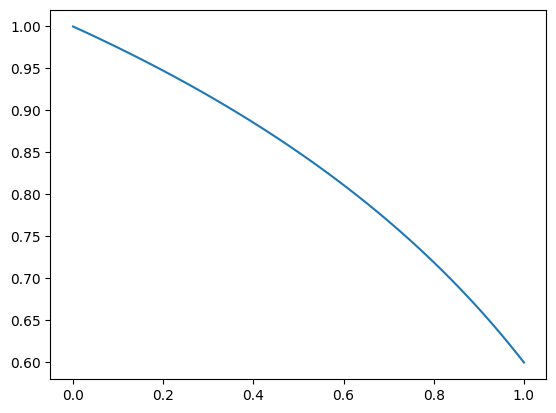

In [41]:
plt.plot(xi,solution[:,0])
solution[-1,0]

In [30]:
solution[:,0]

array([1.        , 0.99986832, 0.9996342 , 0.99928301, 0.9988147 ,
       0.99822924, 0.99752658, 0.99670668, 0.99576945, 0.99471484,
       0.99354278, 0.99225318, 0.99084596, 0.98932105, 0.98767837,
       0.98591783, 0.98403937, 0.98204291, 0.97992841, 0.97769582,
       0.97534511, 0.97287627, 0.97028929, 0.96758422, 0.96476111,
       0.96182004, 0.95876114, 0.95558456, 0.95229051, 0.94887923,
       0.94535103, 0.94170624, 0.93794529, 0.93406866, 0.93007689,
       0.92597063, 0.92175057, 0.91741753, 0.9129724 , 0.90841618,
       0.90374999, 0.89897507, 0.89409276, 0.88910456, 0.88401211,
       0.8788172 , 0.87352179, 0.86812799, 0.86263811, 0.85705466,
       0.85138034, 0.84561806, 0.83977098, 0.83384248, 0.82783621,
       0.82175606, 0.81560622, 0.80939117, 0.80311568, 0.79678486,
       0.79040412, 0.78397926, 0.7775164 , 0.77102204, 0.76450309,
       0.75796681, 0.7514209 , 0.74487346, 0.738333  , 0.73180847,
       0.72530924, 0.71884511, 0.7124263 , 0.70606346, 0.69976

In [102]:
def func(y, x):
    gamma = 0.86998
    return np.array([y[1], -(gamma**2/2*x*y[1]+3*y[0]**2*y[1]**2)/y[0]**3])

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def get_init_solution(x, T):
    alphas = np.linspace(-0.28969, -0.01, 1000)
    for alpha in alphas:
        y0 = np.array([1, alpha])
        solution = rk4(func, y0, x)
        if np.abs(solution[-1,0] - T) < 10**(-3):
            break
    return solution[:,0]

N = 50

xi = np.cos(np.pi / (N+1) * (np.arange(1, N + 2) - 0.5)).astype(np.float64)
xi[0], xi[-1] = 1, -1
xi = xi[::-1] * 0.5 + 0.5
# xi = 0.5 * (xi[1:] + xi[:-1])
sgnB = 1
T = 0.4

W0 = get_init_solution(xi, T)[1:-1]
xi = xi[1:-1]

0.36814623165925253

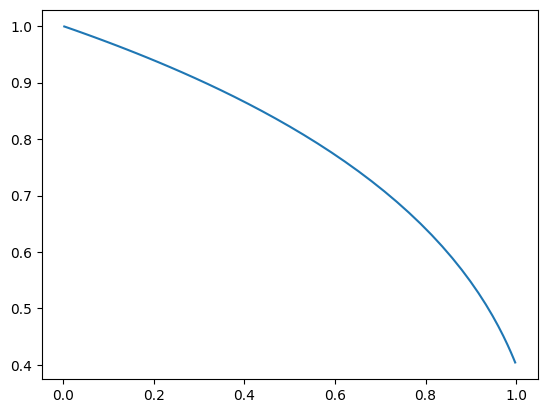

In [105]:
plt.plot(xi,W0)
# plt.plot(solution[:,1])
solution[-1,0]

In [7]:
xi = np.cos(np.pi / (N+1) * (np.arange(1, N + 2) - 0.5)).astype(np.float64)
xi[0], xi[-1] = 1, -1
xi = xi[::-1] * 0.5 + 0.5
xi

array([0.00000000e+00, 5.44127579e-04, 1.51097809e-03, 2.96008453e-03,
       4.89004499e-03, 7.29899236e-03, 1.01845961e-02, 1.35440647e-02,
       1.73741479e-02, 2.16711405e-02, 2.64308853e-02, 3.16487777e-02,
       3.73197697e-02, 4.34383749e-02, 4.99986740e-02, 5.69943203e-02,
       6.44185460e-02, 7.22641686e-02, 8.05235980e-02, 8.91888437e-02,
       9.82515227e-02, 1.07702867e-01, 1.17533734e-01, 1.27734612e-01,
       1.38295633e-01, 1.49206580e-01, 1.60456897e-01, 1.72035699e-01,
       1.83931786e-01, 1.96133648e-01, 2.08629482e-01, 2.21407198e-01,
       2.34454434e-01, 2.47758568e-01, 2.61306730e-01, 2.75085812e-01,
       2.89082484e-01, 3.03283205e-01, 3.17674237e-01, 3.32241657e-01,
       3.46971373e-01, 3.61849134e-01, 3.76860547e-01, 3.91991089e-01,
       4.07226123e-01, 4.22550910e-01, 4.37950624e-01, 4.53410366e-01,
       4.68915181e-01, 4.84450069e-01, 5.00000000e-01, 5.15549931e-01,
       5.31084819e-01, 5.46589634e-01, 5.62049376e-01, 5.77449090e-01,
      